**PARA TESTAR USAR BASE**: PicMoney-Massa_de_Teste_com_Lojas_e_Valores-10000 linhas (1)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('picmoneyFin.csv', sep=';')
df.head()

,numero_celular,data_captura,tipo_cupom,tipo_loja,local_captura,latitude,longitude,nome_loja,endereco_loja,valor_compra,valor_cupom
0,(41) 96047-8110,05/07/2025,Produto,outros,Calçada aleatória,-23.563.850.985.754.000,-4.665.004.147.929.030,Pão de Açúcar,"Rua Pamplona, 1704",834.43,28.21
1,(11) 94020-8306,12/07/2025,Desconto,móveis,Calçada aleatória,-2.356.380.569.343.850,-4.664.954.309.104.300,Pão de Açúcar,"Rua Pamplona, 1704",884.21,398.81
2,(11) 92863-4530,19/07/2025,Produto,móveis,Shopping Cidade São Paulo,-23.563.227.246.012.400,-4.665.237.324.108.700,Kalunga,"Rua Augusta, 2220",903.79,48.43
3,(11) 94282-1224,19/07/2025,Produto,vestuário,Semáforo,-2.356.152.623.615.530,-4.665.376.976.958.120,Daiso Japan,"Shopping Pátio Paulista, Rua Treze de Maio, 1947",792.39,10.82
4,(11) 91506-1278,05/07/2025,Produto,outros,Shopping Pátio Paulista,-2.357.068.984.231.570,-46.645.488.231.986.900,Smart Fit,"Av. Paulista, 2006",146.92,8.34


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
df.drop('numero_celular', axis=1, inplace=True)

In [ ]:
df.drop('local_captura', axis=1, inplace=True)
df.drop('latitude', axis=1, inplace=True)
df.drop('longitude', axis=1, inplace=True)
df.drop('endereco_loja', axis=1, inplace=True)

In [ ]:
df.head(10)

,data_captura,tipo_cupom,tipo_loja,nome_loja,valor_compra,valor_cupom
0,05/07/2025,Produto,outros,Pão de Açúcar,834.43,28.21
1,12/07/2025,Desconto,móveis,Pão de Açúcar,884.21,398.81
2,19/07/2025,Produto,móveis,Kalunga,903.79,48.43
3,19/07/2025,Produto,vestuário,Daiso Japan,792.39,10.82
4,05/07/2025,Produto,outros,Smart Fit,146.92,8.34
5,11/07/2025,Produto,outros,Daiso Japan,920.12,38.00
6,26/07/2025,Cashback,outros,Daiso Japan,534.74,26.74
7,06/07/2025,Cashback,restaurante,Livraria Cultura,534.23,26.71
8,20/07/2025,Desconto,móveis,Drogaria São Paulo,581.38,259.78
9,27/07/2025,Produto,vestuário,Kalunga,322.49,15.15


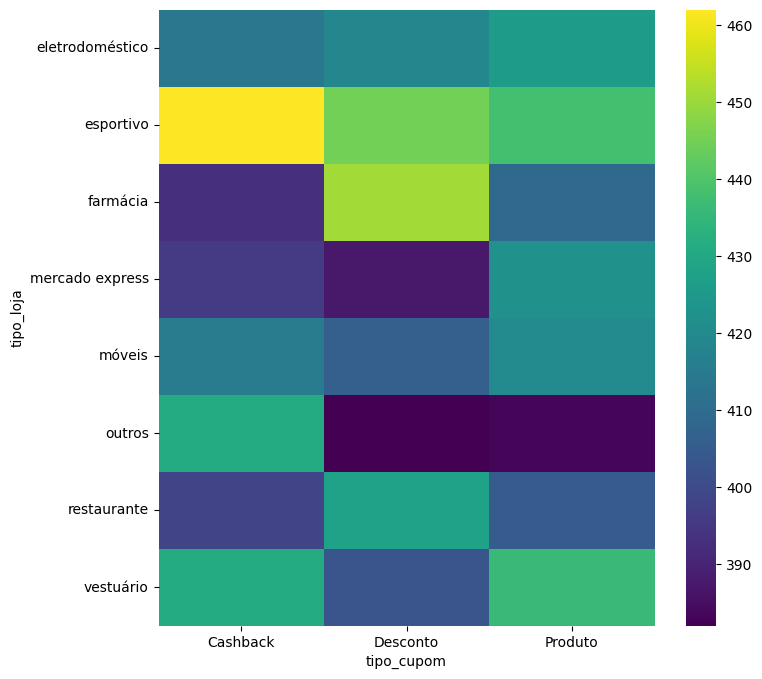

In [ ]:
# @title tipo_cupom vs tipo_loja

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['tipo_loja'].value_counts()
    for x_label, grp in df.groupby('tipo_cupom')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tipo_cupom')
_ = plt.ylabel('tipo_loja')

In [ ]:
df.describe()

,valor_compra,valor_cupom
count,10000.000000,10000.000000
mean,549.684075,70.353666
std,260.762003,91.065168
min,100.090000,1.230000
25%,323.385000,16.127500
50%,548.885000,32.920000
75%,776.260000,79.822500
max,999.920000,492.570000


In [ ]:
df.drop('tipo_loja', axis=1, inplace=True)


In [ ]:
df.head()

,data_captura,tipo_cupom,nome_loja,valor_compra,valor_cupom
0,05/07/2025,Produto,Pão de Açúcar,834.43,28.21
1,12/07/2025,Desconto,Pão de Açúcar,884.21,398.81
2,19/07/2025,Produto,Kalunga,903.79,48.43
3,19/07/2025,Produto,Daiso Japan,792.39,10.82
4,05/07/2025,Produto,Smart Fit,146.92,8.34


/tmp/ipython-input-1914094809.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='valor_liquido', y='nome_loja', data=loja_data, palette='viridis')


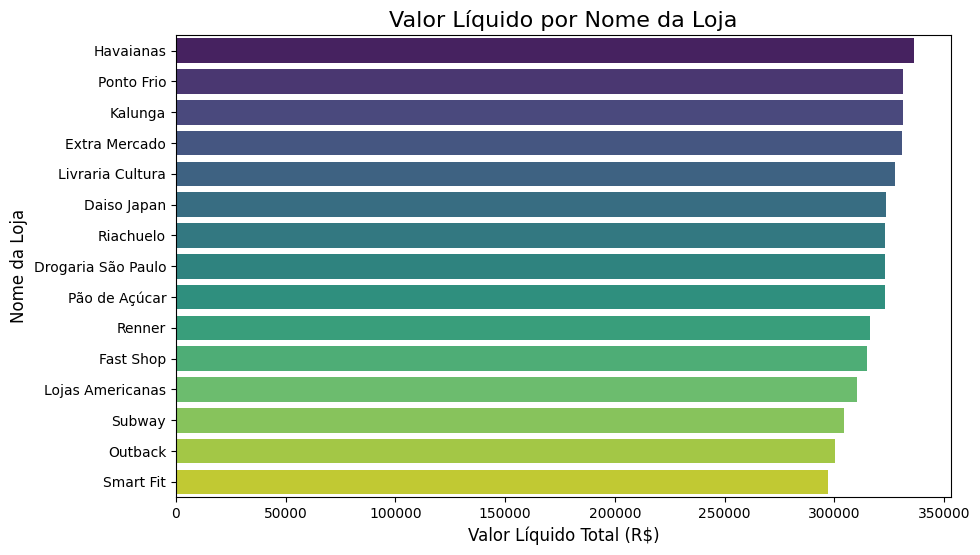

In [ ]:
df['data_captura'] = pd.to_datetime(df['data_captura'], format='%d/%m/%Y')

# Cria a coluna 'valor_liquido'
df['valor_liquido'] = df['valor_compra'] - df['valor_cupom']

# Agrega os dados por 'tipo_loja'
loja_data = df.groupby('nome_loja')['valor_liquido'].sum().sort_values(ascending=False).reset_index()

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='valor_liquido', y='nome_loja', data=loja_data, palette='viridis')

# Define o título e os rótulos do gráfico
plt.title('Valor Líquido por Nome da Loja', fontsize=16)
plt.xlabel('Valor Líquido Total (R$)', fontsize=12)
plt.ylabel('Nome da Loja', fontsize=12)

# Salva o gráfico em um arquivo
plt.savefig('valor_liquido_por_nome_da_loja.png')

/tmp/ipython-input-1914094809.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='valor_liquido', y='nome_loja', data=loja_data, palette='viridis')


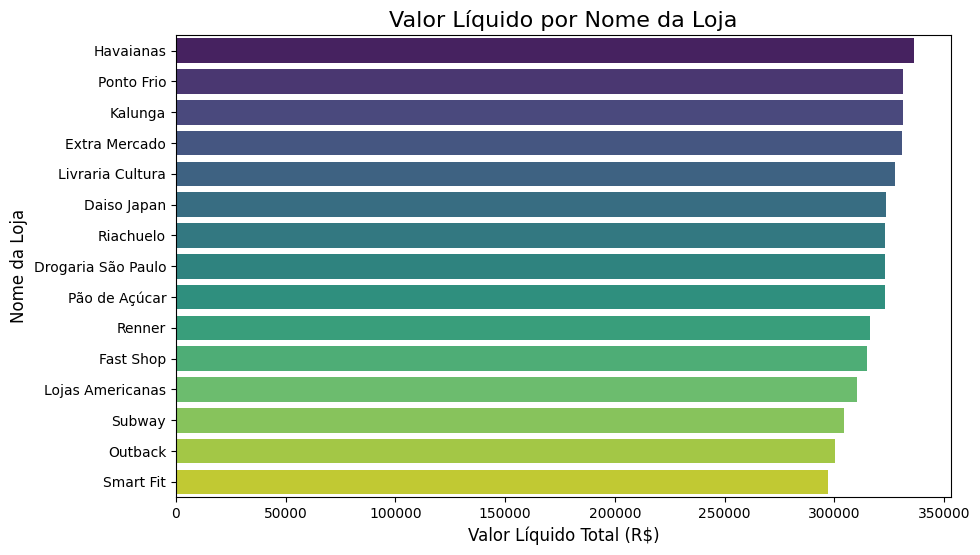

In [ ]:
df['data_captura'] = pd.to_datetime(df['data_captura'], format='%d/%m/%Y')

# Cria a coluna 'valor_liquido'
df['valor_liquido'] = df['valor_compra'] - df['valor_cupom']

# Agrega os dados por 'tipo_loja'
loja_data = df.groupby('nome_loja')['valor_liquido'].sum().sort_values(ascending=False).reset_index()

# Cria o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='valor_liquido', y='nome_loja', data=loja_data, palette='viridis')

# Define o título e os rótulos do gráfico
plt.title('Valor Líquido por Nome da Loja', fontsize=16)
plt.xlabel('Valor Líquido Total (R$)', fontsize=12)
plt.ylabel('Nome da Loja', fontsize=12)

# Salva o gráfico em um arquivo
plt.savefig('valor_liquido_por_nome_da_loja.png')

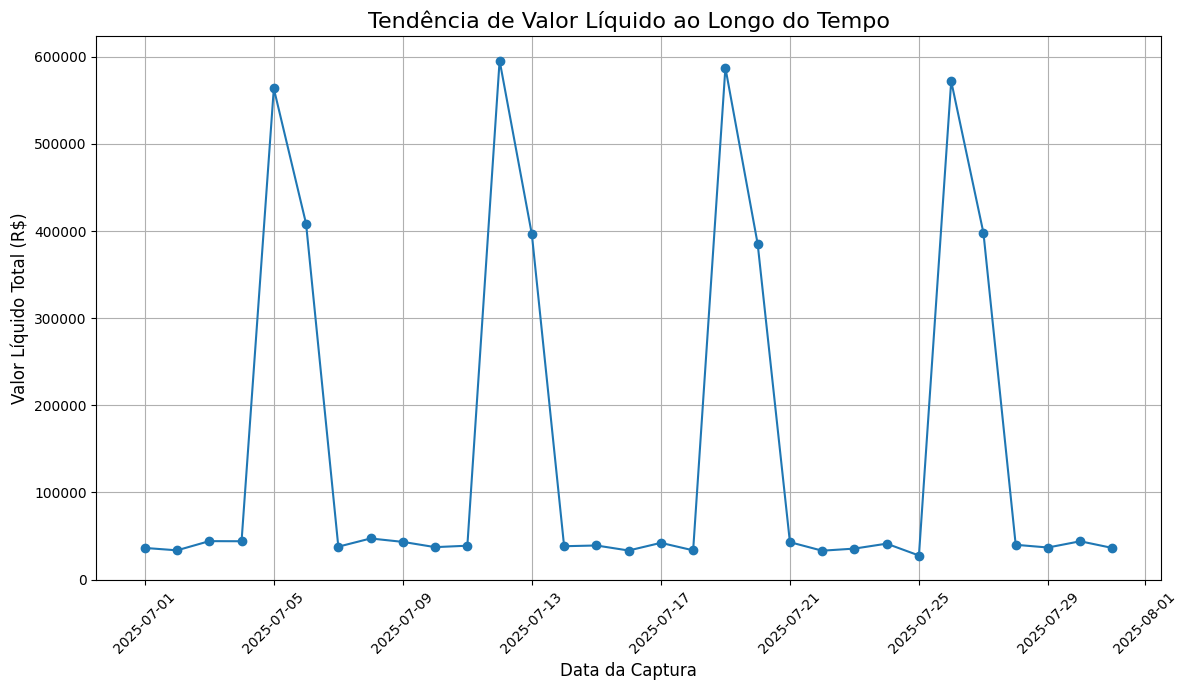

In [ ]:
# Agrupe os dados por data e some o valor líquido
daily_sales = df.groupby(df['data_captura'].dt.date)['valor_liquido'].sum().reset_index()
daily_sales['data_captura'] = pd.to_datetime(daily_sales['data_captura'])

# Crie o gráfico de linha
plt.figure(figsize=(12, 7))
plt.plot(daily_sales['data_captura'], daily_sales['valor_liquido'], marker='o', linestyle='-')

# Adicione rótulos e título
plt.title('Tendência de Valor Líquido ao Longo do Tempo', fontsize=16)
plt.xlabel('Data da Captura', fontsize=12)
plt.ylabel('Valor Líquido Total (R$)', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Salve o gráfico em um arquivo PNG
plt.savefig('tendencia_valor_liquido_tempo.png')

plt.show()

In [ ]:
df.head()

,data_captura,tipo_cupom,nome_loja,valor_compra,valor_cupom,valor_liquido
0,2025-07-05,Produto,Pão de Açúcar,834.43,28.21,806.22
1,2025-07-12,Desconto,Pão de Açúcar,884.21,398.81,485.40
2,2025-07-19,Produto,Kalunga,903.79,48.43,855.36
3,2025-07-19,Produto,Daiso Japan,792.39,10.82,781.57
4,2025-07-05,Produto,Smart Fit,146.92,8.34,138.58


In [ ]:
df["ROI"] = (df["valor_compra"] - df["valor_cupom"]) / df["valor_cupom"]
df.head(10)

,data_captura,tipo_cupom,nome_loja,valor_compra,valor_cupom,valor_liquido,ROI
0,2025-07-05,Produto,Pão de Açúcar,834.43,28.21,806.22,28.579227
1,2025-07-12,Desconto,Pão de Açúcar,884.21,398.81,485.40,1.217121
2,2025-07-19,Produto,Kalunga,903.79,48.43,855.36,17.661780
3,2025-07-19,Produto,Daiso Japan,792.39,10.82,781.57,72.233826
4,2025-07-05,Produto,Smart Fit,146.92,8.34,138.58,16.616307
5,2025-07-11,Produto,Daiso Japan,920.12,38.00,882.12,23.213684
6,2025-07-26,Cashback,Daiso Japan,534.74,26.74,508.00,18.997756
7,2025-07-06,Cashback,Livraria Cultura,534.23,26.71,507.52,19.001123
8,2025-07-20,Desconto,Drogaria São Paulo,581.38,259.78,321.60,1.237971
9,2025-07-27,Produto,Kalunga,322.49,15.15,307.34,20.286469


In [ ]:
df.describe()

,data_captura,valor_compra,valor_cupom,valor_liquido,ROI
count,10000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2025-07-15 19:14:00.960000,549.684075,70.353666,479.330409,18.929277
min,2025-07-01 00:00:00,100.090000,1.230000,51.510000,1.000815
25%,2025-07-08 00:00:00,323.385000,16.127500,276.615000,3.956155
50%,2025-07-15 00:00:00,548.885000,32.920000,463.085000,18.998397
75%,2025-07-23 00:00:00,776.260000,79.822500,670.922500,19.880057
max,2025-07-31 00:00:00,999.920000,492.570000,983.800000,98.929907
std,NaN,260.762003,91.065168,241.855558,17.199005


Correlação entre valor_compra e valor_cupom: 0.3747015183069364


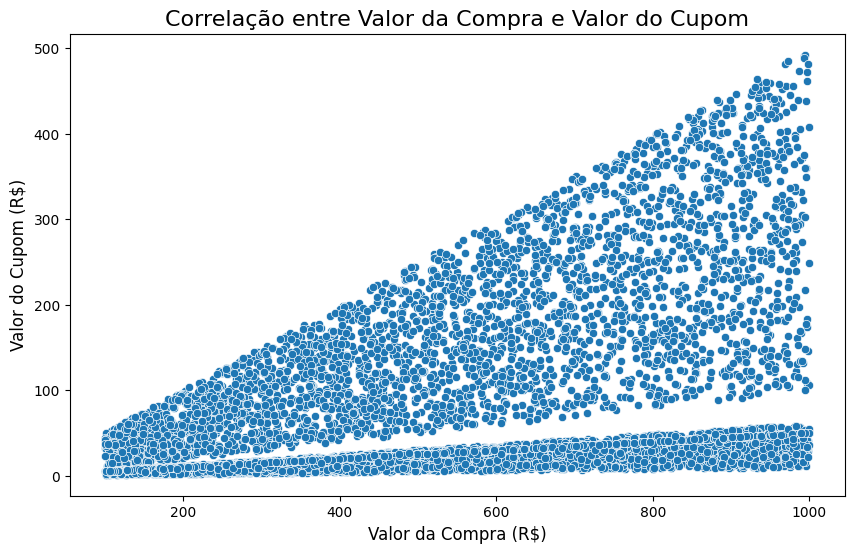

In [ ]:
correlation = df['valor_compra'].corr(df['valor_cupom'])
print("Correlação entre valor_compra e valor_cupom:", correlation)
# Crie o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='valor_compra', y='valor_cupom', data=df)

# Adicione título e rótulos
plt.title('Correlação entre Valor da Compra e Valor do Cupom', fontsize=16)
plt.xlabel('Valor da Compra (R$)', fontsize=12)
plt.ylabel('Valor do Cupom (R$)', fontsize=12)

# Salve o gráfico em um arquivo PNG
plt.savefig('correlacao_compra_cupom.png')

Correlação entre valor_compra e valor_cupom: 0.374. ou seja, há uma correlação positiva, porém fraca.

                            OLS Regression Results                            
Dep. Variable:          valor_liquido   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                 7.204e+04
Date:                Thu, 11 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:52:43   Log-Likelihood:                -58548.
No. Observations:               10000   AIC:                         1.171e+05
Df Residuals:                    9998   BIC:                         1.171e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.5758      1.970      0.800   

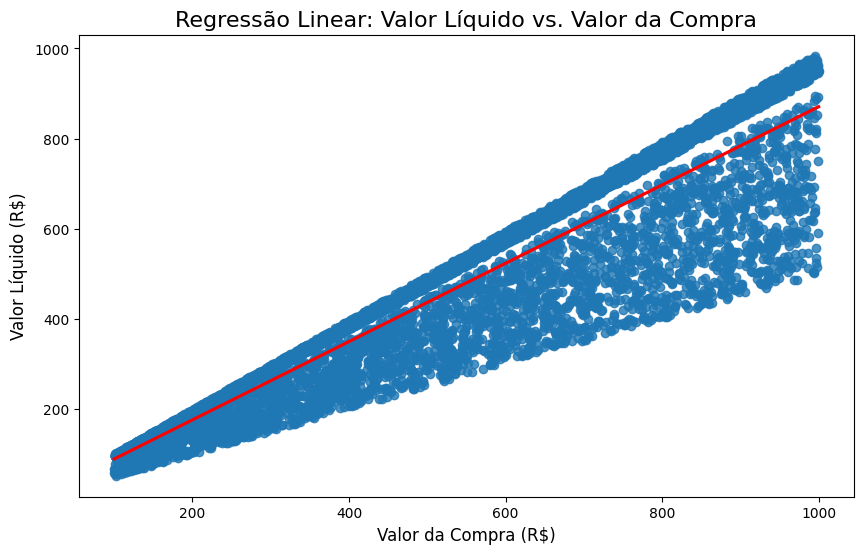

In [ ]:
# 3. Realizar a análise de regressão
# 'valor_liquido' é a variável dependente (Y) e 'valor_compra' é a variável independente (X)
model = smf.ols('valor_liquido ~ valor_compra', data=df)
results = model.fit()

# Imprimir o resumo estatístico
print(results.summary())

# 4. Crie um gráfico de dispersão com a linha de regressão
plt.figure(figsize=(10, 6))
sns.regplot(x='valor_compra', y='valor_liquido', data=df, line_kws={'color':'red'})

# Adicione título e rótulos
plt.title('Regressão Linear: Valor Líquido vs. Valor da Compra', fontsize=16)
plt.xlabel('Valor da Compra (R$)', fontsize=12)
plt.ylabel('Valor Líquido (R$)', fontsize=12)

# Salve o gráfico em um arquivo PNG
plt.savefig('regressao_compra_liquido.png')

# Opcional: para exibir o gráfico na tela
plt.show()

R-quadrado (R-squared) = 0,88:

O que significa: Isso indica que 88% da variação no `valor_liquido` é explicada pela variação no `valor_compra`. Um valor próximo de 1,00 significa que seu modelo é um excelente preditor.

Coeficiente de `valor_compra` (coef) = 0,87:

O que significa: Para cada R$ 1,00 de aumento no `valor_compra`, o `valor_liquido` aumenta em R$ 0,87, em média. Esse coeficiente é a parte central da sua fórmula de previsão.

P-valor (P>|t|) = 0,000 para `valor_compra`:

O que significa: O resultado é estatisticamente significativo. Isso garante que a relação entre as duas variáveis não é aleatória e pode ser usada com confiança para tomar decisões.

Estatística F (F-statistic) e seu P-valor (Prob (F-statistic)) = 0,00:

O que significa: O modelo de regressão como um todo é estatisticamente significativo. Isso reforça que o `valor_compra` é uma variável importante para prever o `valor_liquido`.

In [ ]:
df.head(20)

,data_captura,tipo_cupom,nome_loja,valor_compra,valor_cupom,valor_liquido,ROI
0,2025-07-05,Produto,Pão de Açúcar,834.43,28.21,806.22,28.579227
1,2025-07-12,Desconto,Pão de Açúcar,884.21,398.81,485.40,1.217121
2,2025-07-19,Produto,Kalunga,903.79,48.43,855.36,17.661780
3,2025-07-19,Produto,Daiso Japan,792.39,10.82,781.57,72.233826
4,2025-07-05,Produto,Smart Fit,146.92,8.34,138.58,16.616307
5,2025-07-11,Produto,Daiso Japan,920.12,38.00,882.12,23.213684
6,2025-07-26,Cashback,Daiso Japan,534.74,26.74,508.00,18.997756
7,2025-07-06,Cashback,Livraria Cultura,534.23,26.71,507.52,19.001123
8,2025-07-20,Desconto,Drogaria São Paulo,581.38,259.78,321.60,1.237971
9,2025-07-27,Produto,Kalunga,322.49,15.15,307.34,20.286469
